In [1]:
import saspy
import pandas as pd
from IPython.display import HTML

In [2]:
sas = saspy.SASsession()

Using SAS Config named: default
SAS Connection established. Subprocess id is 2310



In [3]:
sas

Access Method         = STDIO
SAS Config name       = default
WORK Path             = /tmp/SAS_work3E1500000906_localhost.localdomain/
SAS Version           = 9.04.01M6P11072018
SASPy Version         = 2.2.9
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = UTF-8
Python Encoding value = utf-8

In [4]:
iris = sas.sasdata('iris','sashelp')

In [5]:
sas.sasdata?

Signature: sas.sasdata(table:str, libref:str='', results:str='', dsopts:dict={}) -> 'SASdata'
Docstring:
Method to define an existing SAS dataset so that it can be accessed via SASPy

:param table:   the name of the SAS Data Set
:param libref:  the libref for the Data Set, defaults to WORK, or USER if assigned
:param results: format of results, SASsession.results is default, Pandas, HTML and TEXT are the valid options
:param dsopts: a dictionary containing any of the following SAS data set options(where, drop, keep, obs, firstobs):

    - where is a string
    - keep are strings or list of strings.
    - drop are strings or list of strings.
    - obs is a numbers - either string or int
    - first obs is a numbers - either string or int
    - format is a string or dictionary { var: format }

    .. code-block:: python

                     {'where'    : 'msrp < 20000 and make = "Ford"'
                      'keep'     : 'msrp enginesize Cylinders Horsepower Weight'
                    

In [6]:
iris

Libref  = sashelp
Table   = iris
Dsopts  = {}
Results = Pandas

In [7]:
iris.head()

,Species,SepalLength,SepalWidth,PetalLength,PetalWidth
0,Setosa,50,33,14,2
1,Setosa,46,34,14,3
2,Setosa,46,36,10,2
3,Setosa,51,33,17,5
4,Setosa,55,35,13,2



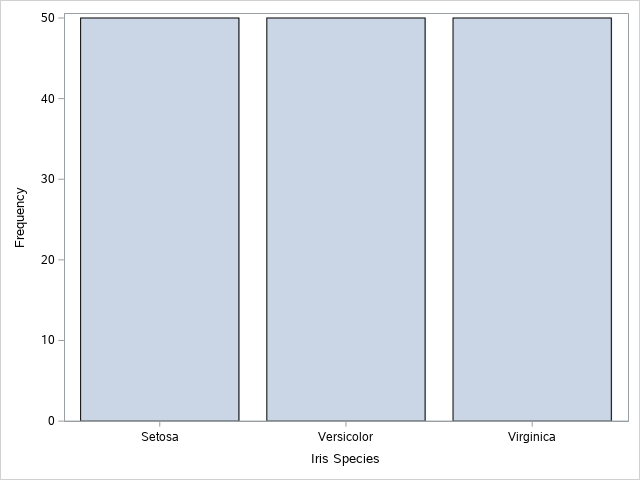

In [8]:
iris.bar('Species')

In [9]:
iris.means()

,Variable,Label,N,NMiss,Median,Mean,StdDev,Min,P25,P50,P75,Max
0,SepalLength,Sepal Length (mm),150,0,58.0,58.433333,8.280661,43,51,58.0,64,79
1,SepalWidth,Sepal Width (mm),150,0,30.0,30.573333,4.358663,20,28,30.0,33,44
2,PetalLength,Petal Length (mm),150,0,43.5,37.580000,17.652982,10,16,43.5,51,69
3,PetalWidth,Petal Width (mm),150,0,13.0,11.993333,7.622377,1,3,13.0,18,25


In [10]:
iris.info()

,Variable,type,N,Nmiss
0,Species,char,150,0
1,SepalLength,numeric,150,0
2,SepalWidth,numeric,150,0
3,PetalLength,numeric,150,0
4,PetalWidth,numeric,150,0


In [13]:
vlist = iris.info().Variable.tolist()
vlist

['Species', 'SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']


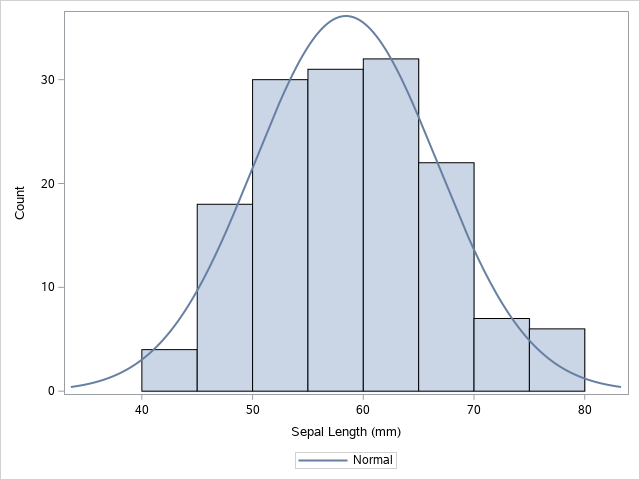


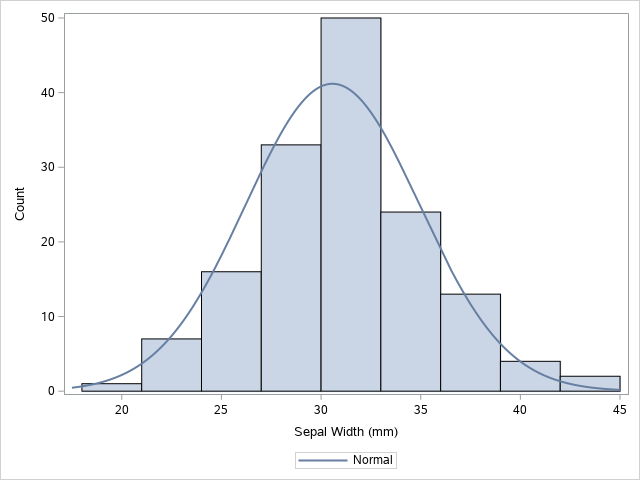


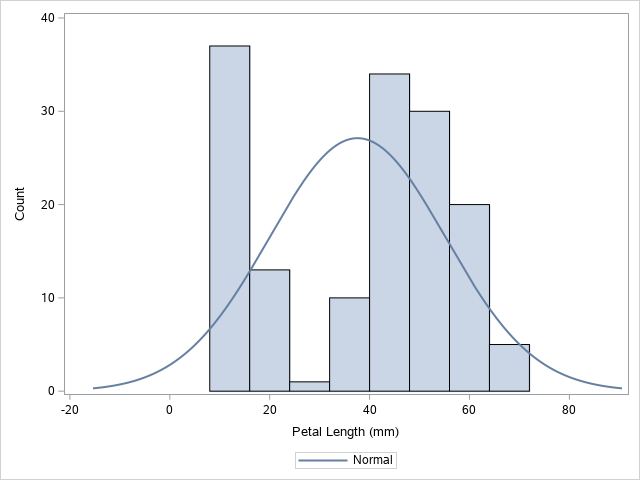


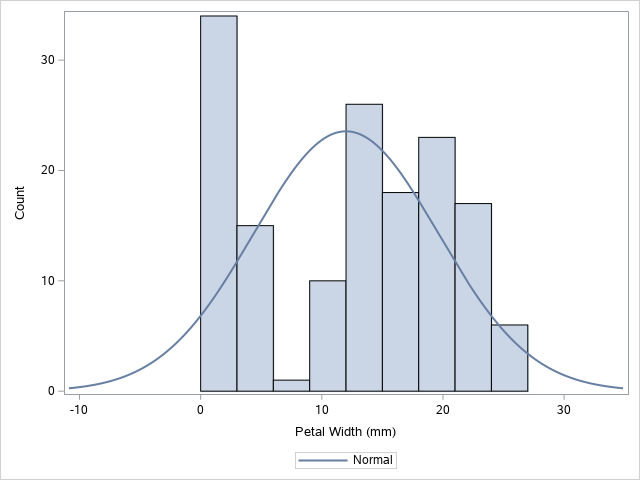

In [14]:
for i in vlist:
    iris.hist(i)


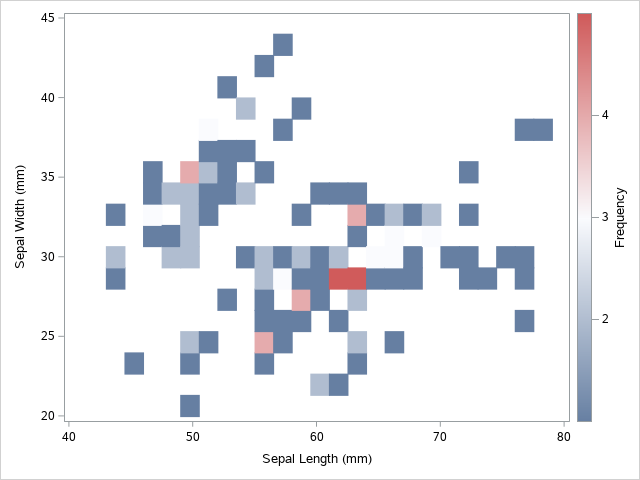

In [15]:
iris.heatmap('sepallength','sepalwidth')

In [19]:
iris.columnInfo()

,Member,Num,Variable,Type,Len,Pos,Label
0,SASHELP.IRIS,4,PetalLength,Num,8,16,Petal Length (mm)
1,SASHELP.IRIS,5,PetalWidth,Num,8,24,Petal Width (mm)
2,SASHELP.IRIS,2,SepalLength,Num,8,0,Sepal Length (mm)
3,SASHELP.IRIS,3,SepalWidth,Num,8,8,Sepal Width (mm)
4,SASHELP.IRIS,1,Species,Char,10,32,Iris Species


In [16]:
stat = sas.sasstat()

In [17]:
stat

In [26]:
stat_res = stat.reg(model = 'PetalLength = SepalLength SepalWidth', data = iris)

In [27]:
dir(stat_res)

['ANOVA',
 'COOKSDPLOT',
 'DFBETASPANEL',
 'DFFITSPLOT',
 'DIAGNOSTICSPANEL',
 'FITSTATISTICS',
 'LOG',
 'NOBS',
 'OBSERVEDBYPREDICTED',
 'PARAMETERESTIMATES',
 'QQPLOT',
 'RESIDUALBOXPLOT',
 'RESIDUALBYPREDICTED',
 'RESIDUALHISTOGRAM',
 'RESIDUALPLOT',
 'RFPLOT',
 'RSTUDENTBYLEVERAGE',
 'RSTUDENTBYPREDICTED']

,Source,DF,SS,MS,FValue,ProbF
0,Model,2,40288.865317,20144.432659,481.99681,2.741726e-65
1,Error,147,6143.674683,41.793705,NaN,NaN
2,Corrected Total,149,46432.540000,NaN,NaN,NaN



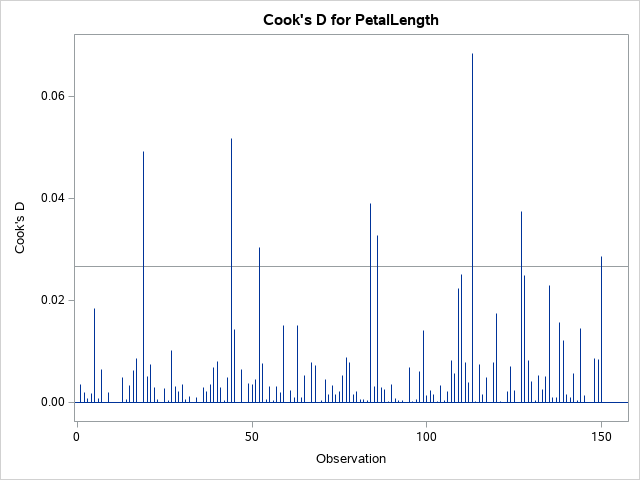


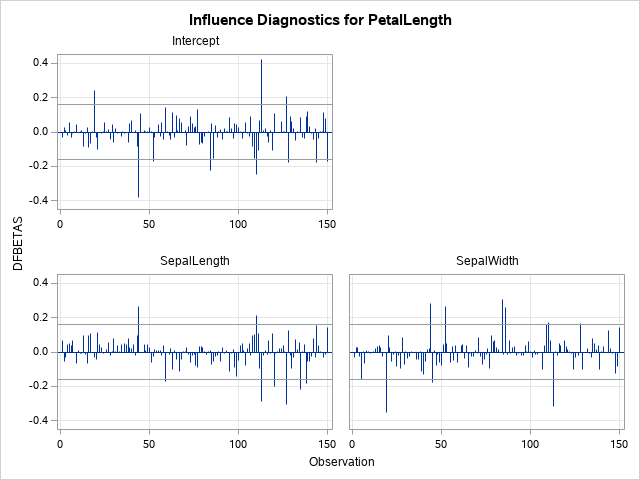


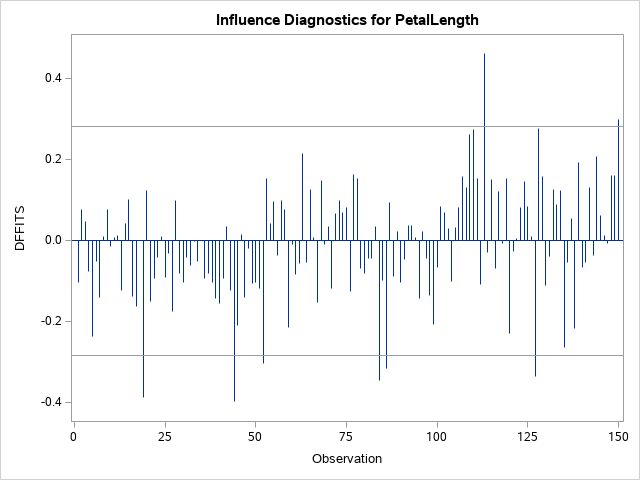


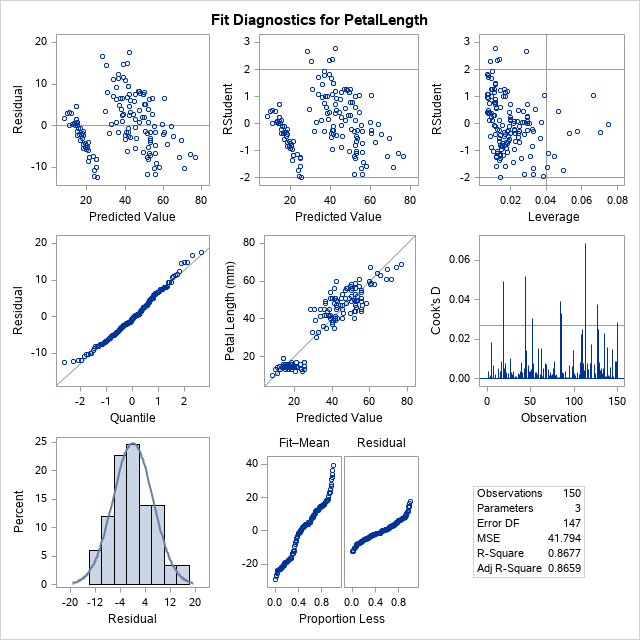

,Label1,cValue1,nValue1,Label2,cValue2,nValue2
0,Root MSE,6.46481,6.464805,R-Square,0.8677,0.867686
1,Dependent Mean,37.58000,37.580000,Adj R-Sq,0.8659,0.865886
2,Coeff Var,17.20278,17.202781,NaN,NaN,0.000000


,N,NObsRead,NObsUsed,SumFreqsRead,SumFreqsUsed,NObsMiss
0,150,150,150,150,150,0
1,150,150,150,150,150,0



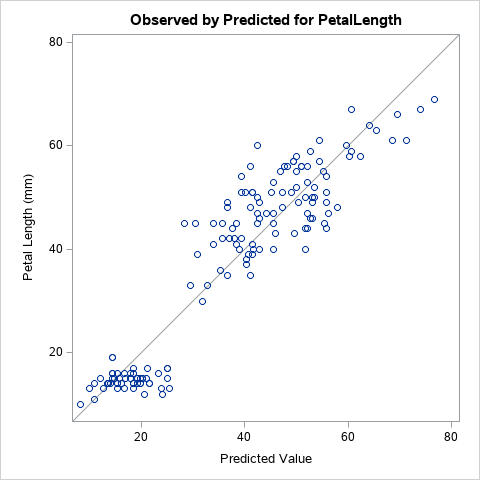

,Variable,DF,Estimate,StdErr,tValue,Probt,Label
0,Intercept,1,-25.247615,5.634397,-4.480979,1.484032e-05,Intercept
1,SepalLength,1,1.775593,0.064405,27.569160,5.847914e-60,Sepal Length (mm)
2,SepalWidth,1,-1.338623,0.122358,-10.940240,9.429194e-21,Sepal Width (mm)



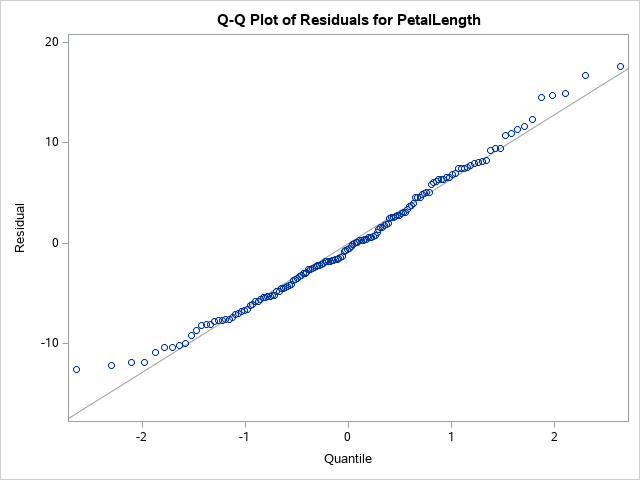


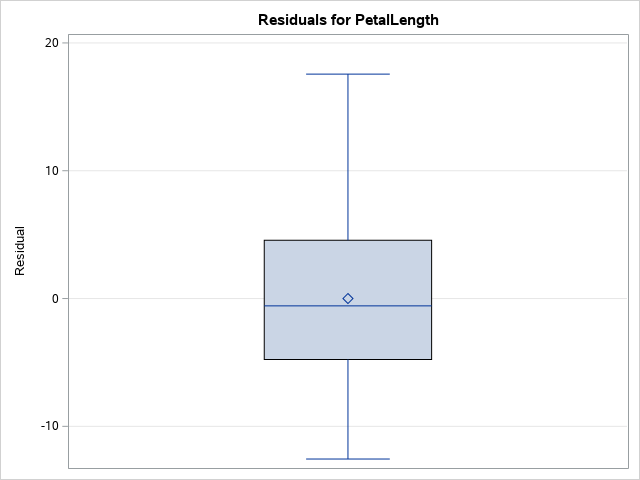


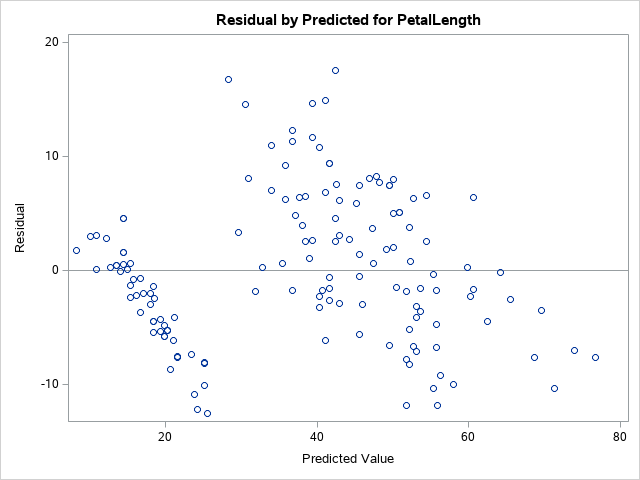


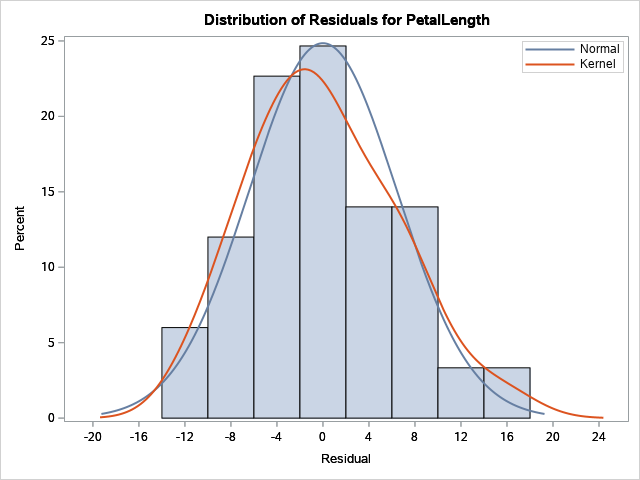


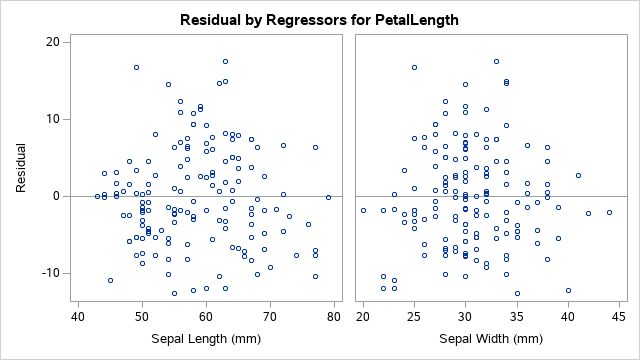


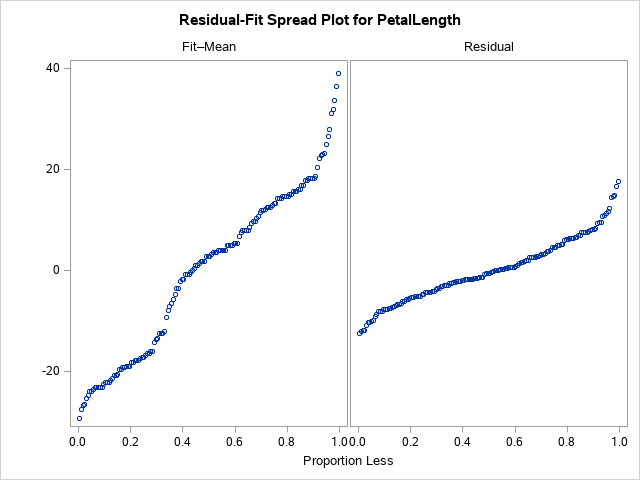


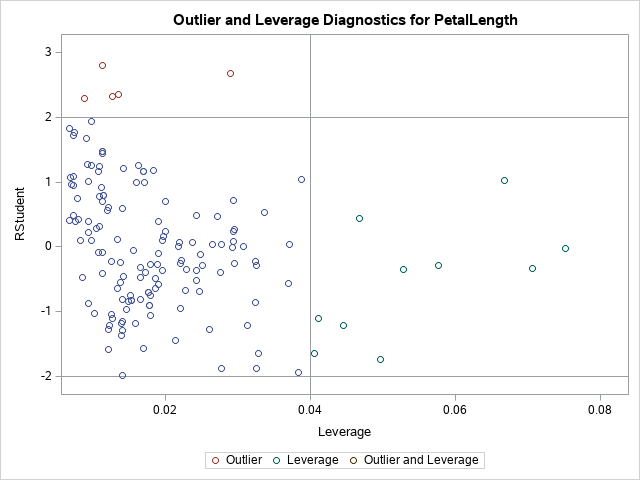


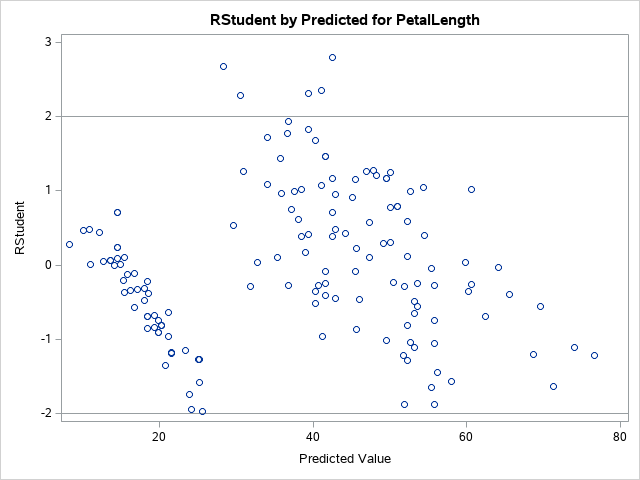

In [28]:
stat_res.ALL()